MBAN 6120 U: Assignment 1 - Ensemble Methods

- Name: Mahin Bindra
- Student ID: 220089330

In [702]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [703]:
# read the banking dataset
df = pd.read_csv('/Users/mahinbindra/Downloads/train 4.csv', delimiter=';')

In [704]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [706]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Part 1: Data Preprocessing

In [708]:
# identify categorical columns with 'unknown' values
unknown_columns = df.columns[df.eq('unknown').any()]
unknown_columns

Index(['job', 'education', 'contact', 'poutcome'], dtype='object')

In [709]:
unknown_count = df['job'].eq('unknown').sum()

# Print the count
print("Count of 'unknown' values:", unknown_count)

Count of 'unknown' values: 288


In [710]:
unknown_count = df['education'].eq('unknown').sum()

# Print the count
print("Count of 'unknown' values:", unknown_count)

Count of 'unknown' values: 1857


In [711]:
unknown_count = df['contact'].eq('unknown').sum()

# Print the count
print("Count of 'unknown' values:", unknown_count)

Count of 'unknown' values: 13020


In [712]:
unknown_count = df['poutcome'].eq('unknown').sum()

# Print the count
print("Count of 'unknown' values:", unknown_count)

Count of 'unknown' values: 36959


More than 80% of the values in the 'poutcome' column are unknown; imputing them and using them as a predictor in model creation can bias the dataset and lead to misleading results. Since there is a substantial amount of incomplete data, we will drop this column as it does not offer concrete information.

In [713]:
df2 = df.copy()

In [714]:
df2.drop('poutcome', axis = 1, inplace=True)

In [715]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  y          45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [716]:
# replace unknown cells with null value
df2.replace('unknown', pd.NA, inplace=True) 

In [717]:
# impute null values with mode value within each column
df2['job'] = df2['job'].fillna(df2['job'].mode().iloc[0])
df2['education'] = df2['education'].fillna(df2['education'].mode().iloc[0])
df2['contact'] = df2['contact'].fillna(df2['contact'].mode().iloc[0])

In [718]:
# check if unknown values have been imputed
unknown_values = df2.columns[df2.eq('unknown').any()]
unknown_values

Index([], dtype='object')

In [719]:
# univariate analysis
df2['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [720]:
import matplotlib.pyplot as plt

In [721]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  y          45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


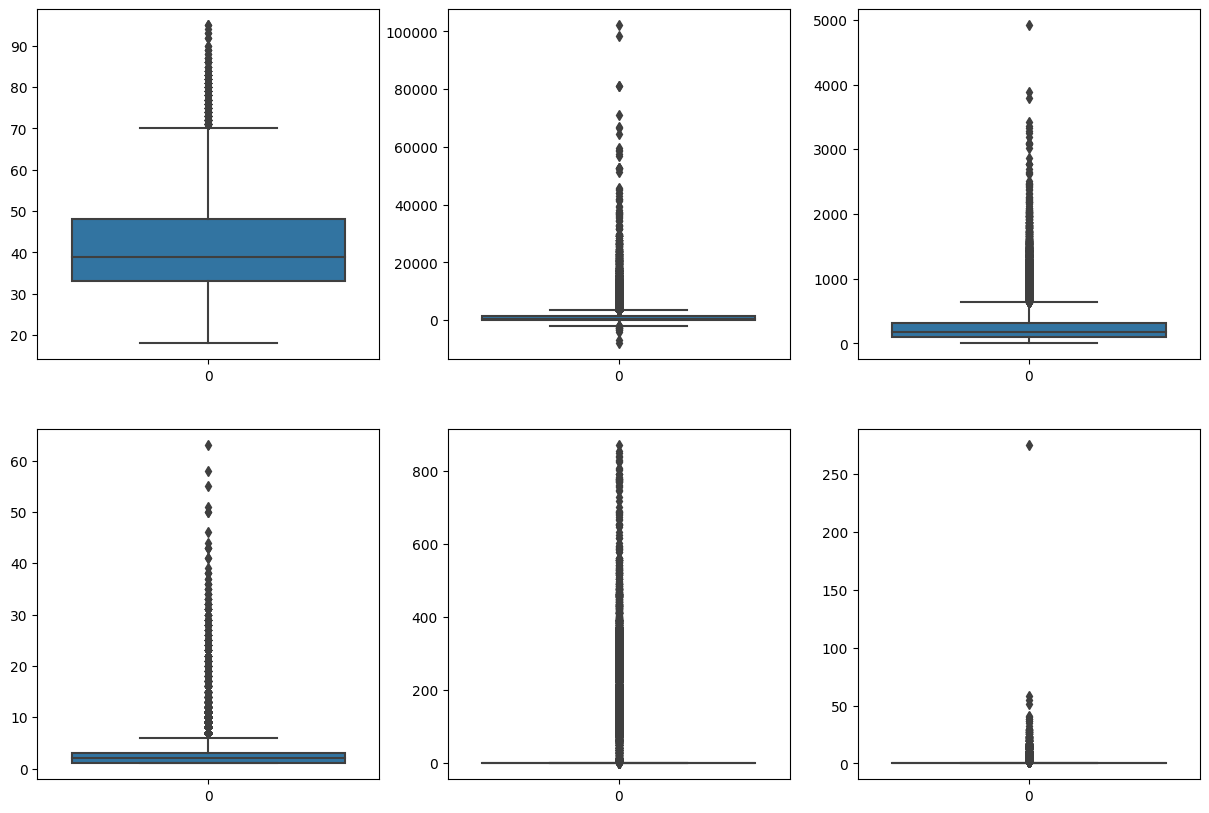

In [722]:
# check for continuous variables 
fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.boxplot(df2['age'], ax = axs[0,0])
plt2 = sns.boxplot(df2['balance'], ax = axs[0,1])
plt3 = sns.boxplot(df2['duration'], ax = axs[0,2])
plt4 = sns.boxplot(df2['campaign'], ax = axs[1,0])
plt5 = sns.boxplot(df2['pdays'], ax = axs[1,1])
plt6 = sns.boxplot(df2['previous'], ax = axs[1,2])

In [723]:
numerical_columns= ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [724]:
# check for skewness in numerical columns
for column in numerical_columns:
    skewness_values = []
    s = skew(df2[column])
    k = kurtosis(df2[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

age: skewness = 0.6847952047866451, kurtosis = 0.31940232676995794
balance: skewness = 8.360030947252687, kurtosis = 140.73584832577242
duration: skewness = 3.1442137770103913, kurtosis = 18.151774935186822
campaign: skewness = 4.898487638410557, kurtosis = 39.24517750942221
pdays: skewness = 2.615628689259389, kurtosis = 6.934295545084991
previous: skewness = 41.84506608797322, kurtosis = 4506.362117674052


In [725]:
# transform skewed columns
if abs(s) > 1:
    df2[column] = df2[column].apply(lambda x: np.log(x + 1))

In [726]:
# calculate z-score to detect outliers in numerical columns
z_scores = zscore(df2[numerical_columns])
threshold = 3

In [727]:
# filter the dataframe to handle any identified outliers
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]

In [728]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39819 entries, 0 to 45209
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        39819 non-null  int64  
 1   job        39819 non-null  object 
 2   marital    39819 non-null  object 
 3   education  39819 non-null  object 
 4   default    39819 non-null  object 
 5   balance    39819 non-null  int64  
 6   housing    39819 non-null  object 
 7   loan       39819 non-null  object 
 8   contact    39819 non-null  object 
 9   day        39819 non-null  int64  
 10  month      39819 non-null  object 
 11  duration   39819 non-null  int64  
 12  campaign   39819 non-null  int64  
 13  pdays      39819 non-null  int64  
 14  previous   39819 non-null  float64
 15  y          39819 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.2+ MB


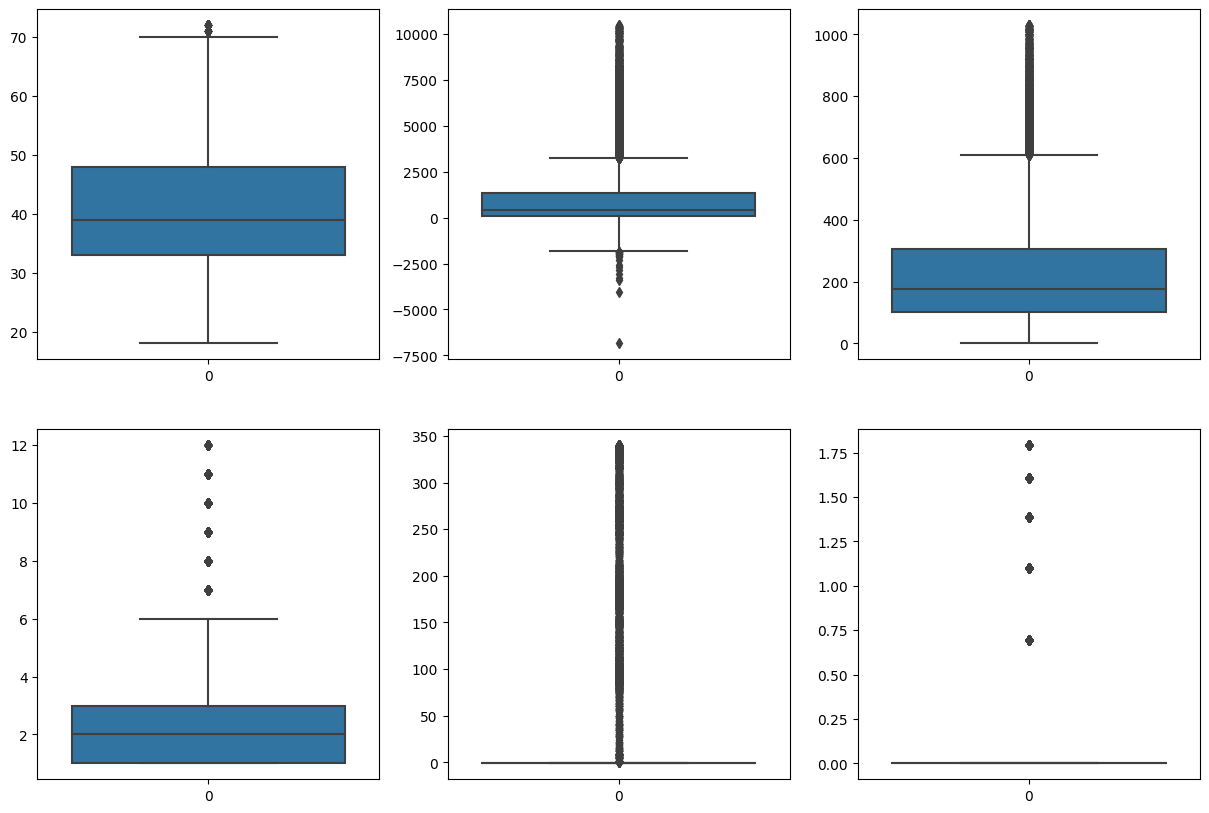

In [729]:
# check for updated columns
fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.boxplot(df2['age'], ax = axs[0,0])
plt2 = sns.boxplot(df2['balance'], ax = axs[0,1])
plt3 = sns.boxplot(df2['duration'], ax = axs[0,2])
plt4 = sns.boxplot(df2['campaign'], ax = axs[1,0])
plt5 = sns.boxplot(df2['pdays'], ax = axs[1,1])
plt6 = sns.boxplot(df2['previous'], ax = axs[1,2])

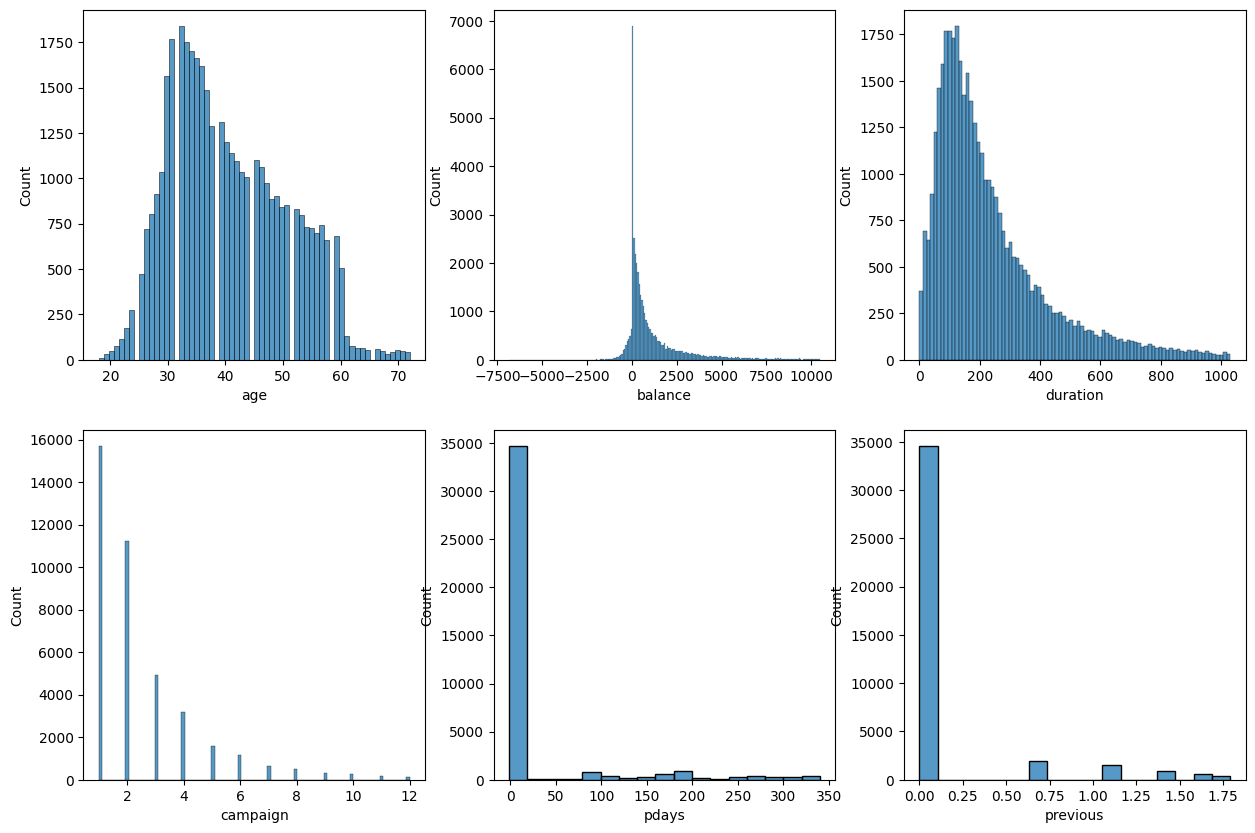

In [730]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.histplot(df2['age'], ax = axs[0,0])
plt2 = sns.histplot(df2['balance'], ax = axs[0,1])
plt3 = sns.histplot(df2['duration'], ax = axs[0,2])
plt4 = sns.histplot(df2['campaign'], ax = axs[1,0])
plt5 = sns.histplot(df2['pdays'], ax = axs[1,1])
plt6 = sns.histplot(df2['previous'], ax = axs[1,2])

<Axes: xlabel='y', ylabel='previous'>

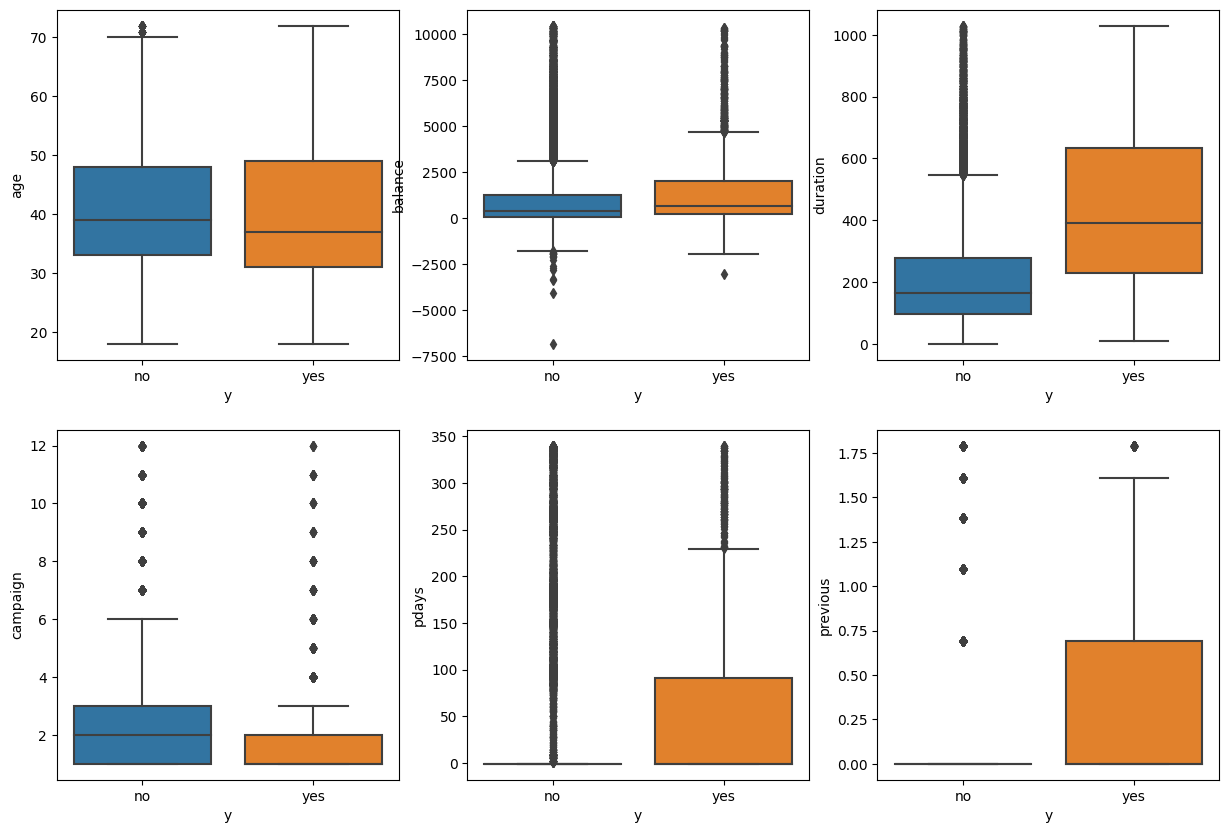

In [731]:
# check continuous variables and compare them to output variable, which in this case is 'y'
fig, axs = plt.subplots(2,3, figsize = (15,10))
sns.boxplot(y = 'age', x = 'y', data = df2, ax = axs[0,0])
sns.boxplot(y = 'balance', x = 'y', data = df2, ax = axs[0,1])
sns.boxplot(y = 'duration', x = 'y', data = df2, ax = axs[0,2])
sns.boxplot(y = 'campaign', x = 'y', data = df2, ax = axs[1,0])
sns.boxplot(y = 'pdays', x = 'y', data = df2, ax = axs[1,1])
sns.boxplot(y = 'previous', x = 'y', data = df2, ax = axs[1,2])

Based on the above bi-variate analysis of continuous variables with the output variable, client's average yearly balance ('balance'), last contact duration ('duration'), number of contacts performed during the campaign ('campaign'), number of days that passed by after the client was last contacted ('pdays') and number of contacts previously performed ('previous') seem to be significant predictors of whether a customer will subscribe to the term deposit or not.

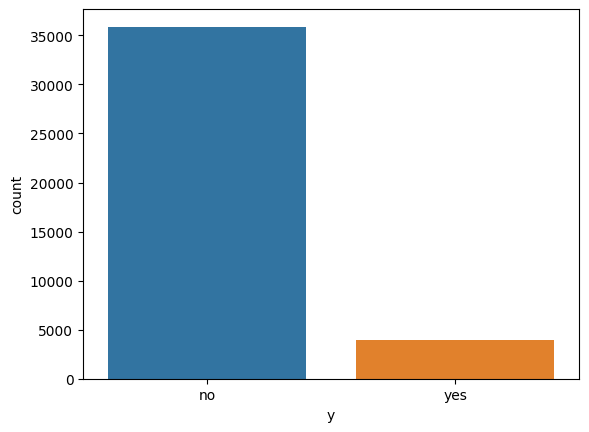

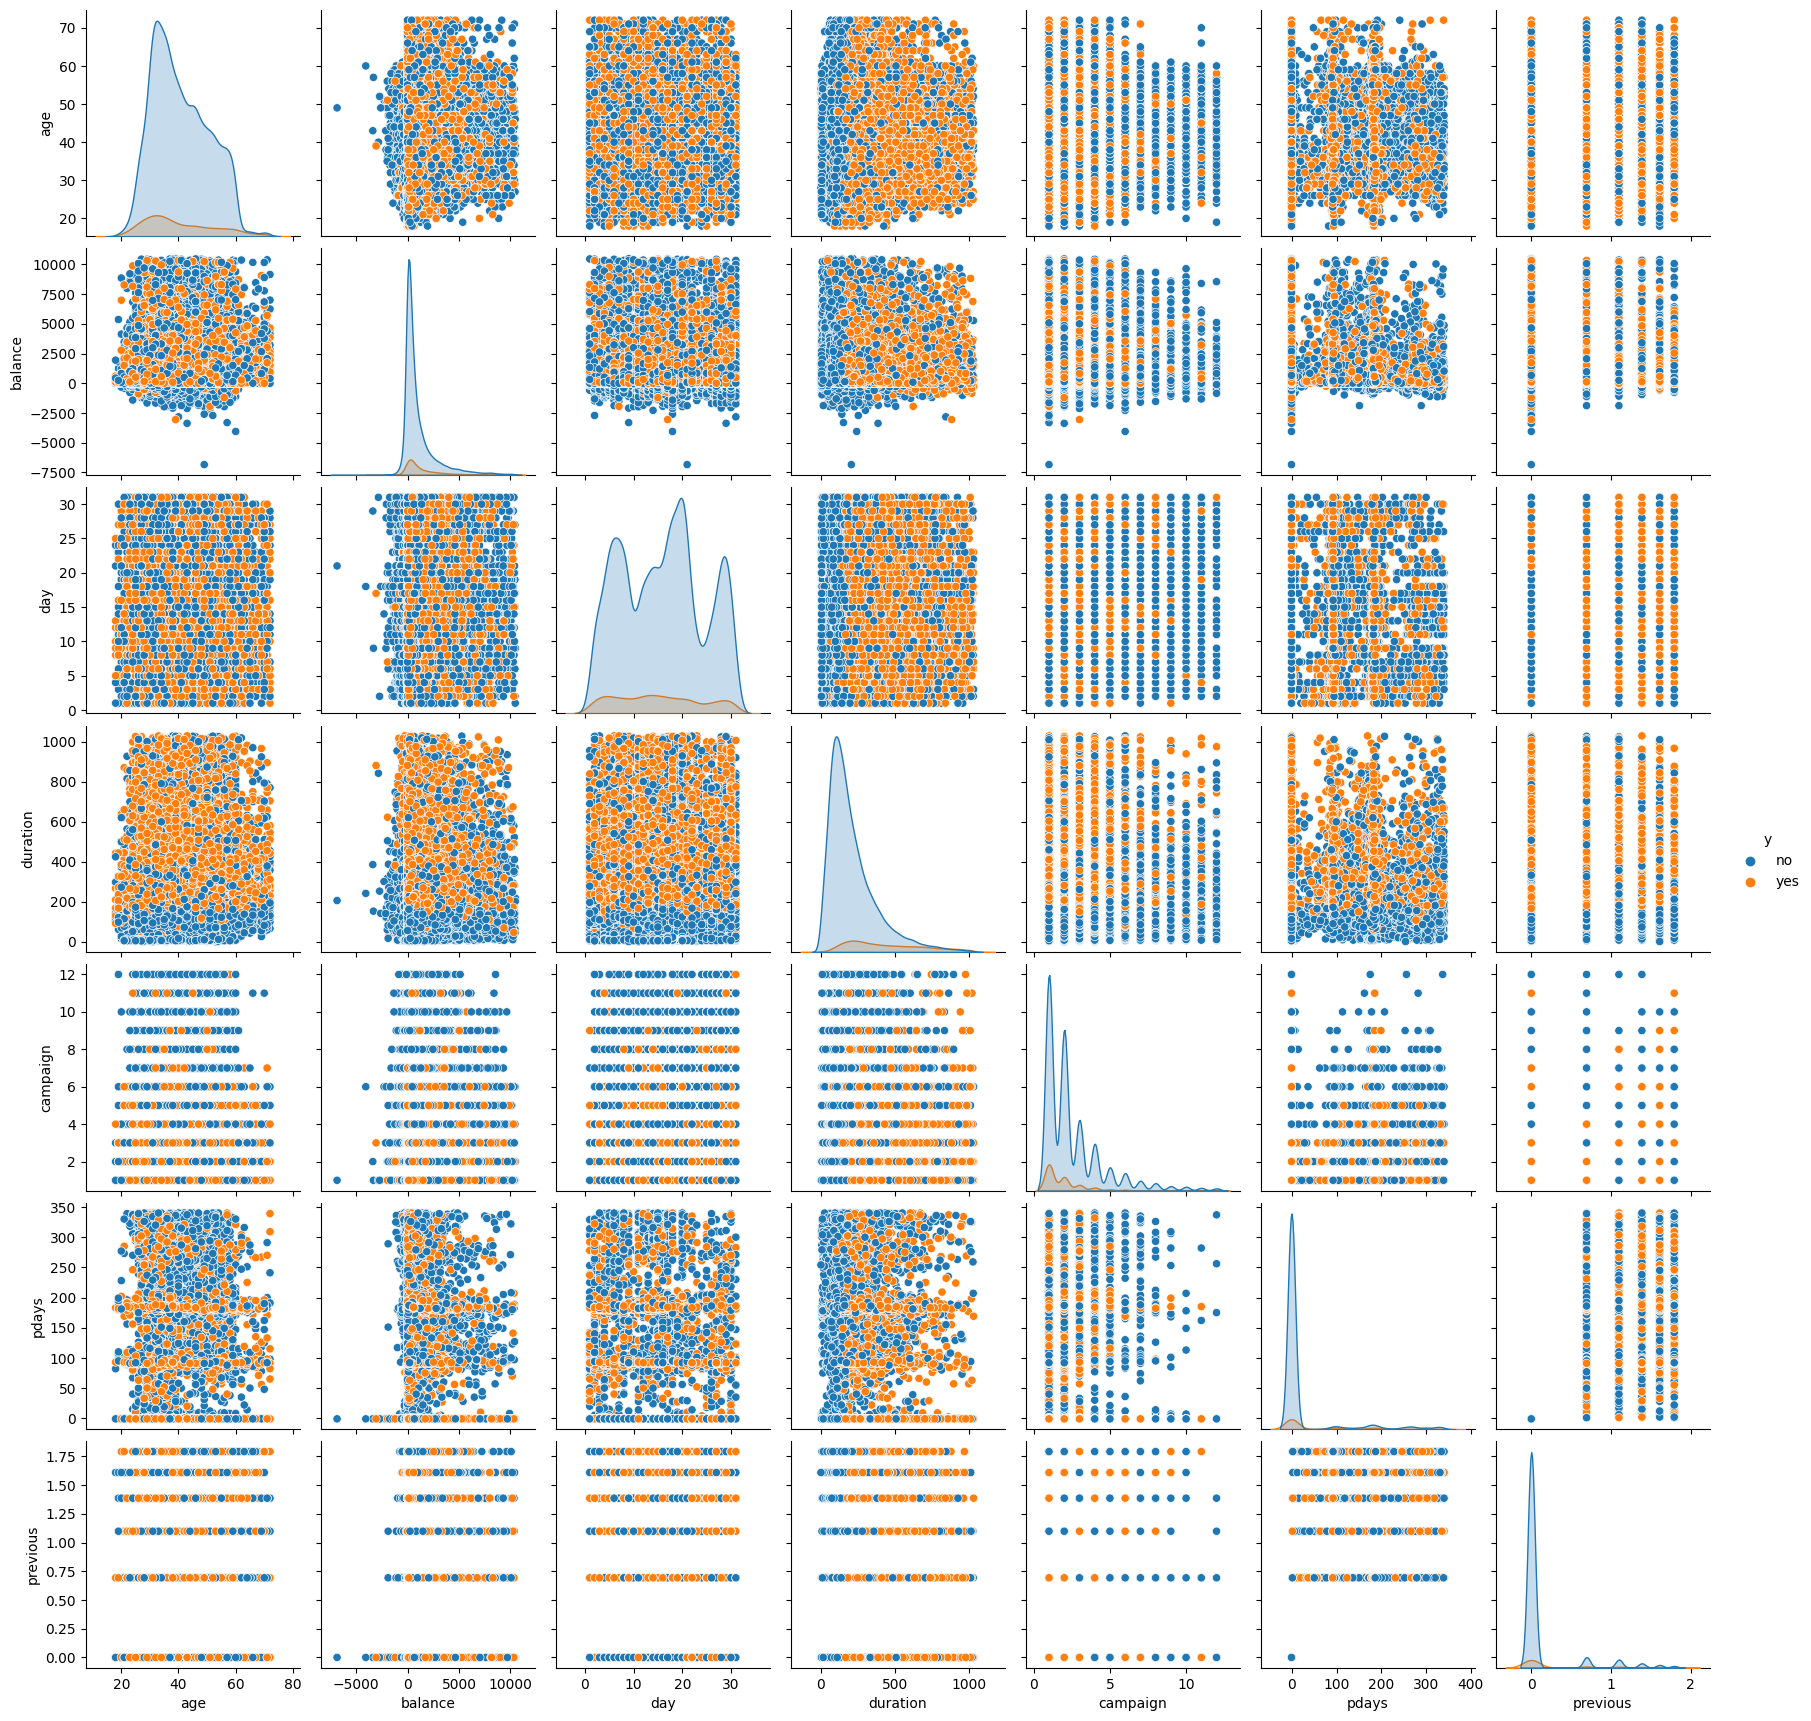

In [732]:
sns.countplot(x='y', data=df2)
plt.show()

# More detailed exploration
sns.pairplot(df2, hue='y')
plt.show()

In [733]:
df3 = df2.copy()

In [734]:
# add column ID and set as index
df3['ID'] = range(1, len(df3)+1)
df3['ID'].sort_index()

0            1
1            2
2            3
3            4
4            5
         ...  
45203    39815
45205    39816
45206    39817
45207    39818
45209    39819
Name: ID, Length: 39819, dtype: int64

In [735]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39819 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        39819 non-null  int64  
 1   job        39819 non-null  object 
 2   marital    39819 non-null  object 
 3   education  39819 non-null  object 
 4   default    39819 non-null  object 
 5   balance    39819 non-null  int64  
 6   housing    39819 non-null  object 
 7   loan       39819 non-null  object 
 8   contact    39819 non-null  object 
 9   day        39819 non-null  int64  
 10  month      39819 non-null  object 
 11  duration   39819 non-null  int64  
 12  campaign   39819 non-null  int64  
 13  pdays      39819 non-null  int64  
 14  previous   39819 non-null  float64
 15  y          39819 non-null  object 
 16  ID         39819 non-null  int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 6.5+ MB


In [736]:
# now we check for categorical variables with the output variable
df3.groupby(['y', 'job'])['ID'].count().unstack()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
no,4090,8295,1243,1036,7333,1441,1257,3444,588,6138,1017
yes,475,565,94,85,979,296,138,271,229,645,160


In [737]:
df3.groupby(['y', 'marital'])['ID'].count().unstack()

marital,divorced,married,single
y,,,
no,4129,22026,9727
yes,443,2014,1480


In [738]:
df3.groupby(['y', 'education'])['ID'].count().unstack()

education,primary,secondary,tertiary
y,,,
no,5610,20150,10122
yes,381,2011,1545


In [739]:
df3.groupby(['y', 'default'])['ID'].count().unstack()

default,no,yes
y,,
no,35178,704
yes,3891,46


In [740]:
df3.groupby(['y', 'housing'])['ID'].count().unstack()

housing,no,yes
y,,
no,15258,20624
yes,2611,1326


In [741]:
df3.groupby(['y', 'loan'])['ID'].count().unstack()

loan,no,yes
y,,
no,29662,6220
yes,3591,346


In [742]:
df3.groupby(['y', 'contact'])['ID'].count().unstack()

contact,cellular,telephone
y,,
no,33829,2053
yes,3701,236


Since even after handling missing values and handling outliers, the dataset is imbalanced, based on the above comparison, we see a massive disparity in the output variable for all aspects of the categorical variables. Hence, we will continue to use all variables as predictors for now but will transform the dataset to make it more amendable to modelling by standardizing and encoding categorical variables.

We will also use ensemble methods such as RandomForest, which can handle imbalances by giving more weight to minority classes and observe if those offer better efficiency vs. others.

In [743]:
# label encode the output variable
def y_stat(x):
    if x =='no':
        return 0
    elif x =='yes':
        return 1

In [744]:
df3['y']= df3['y'].apply(y_stat)

**Pre-Processing Approach**

- First, we start by identifying all the columns with any 'unknown' values, as it was essential to handle such entries. Entries with 'unknown' values indicated incomplete data, and leaving them as-is can lead to inconsistency and inaccuracies in the analysis, creating bias and disrupting model performance. 
After identifying all the columns with unknown values, which were 'job', 'education', 'contact' and 'poutcome', we dropped the column 'pouctome' given that more than 80% of the data needed to be completed. We decided to blame the unknown values with the mode for the remaining columns to preserve the data distribution and ensure data completeness for further analysis.

- Second, we built boxplots and checked for skewness in all numerical columns. After identifying the skewness in numerical columns, we decided to transform those columns and handle any outliers causing that using z-score analysis, as it is a robust method of taking skewness and removing outliers.

- Third, we created boxplots for all continuous variables with the target variable 'y' to identify all critical predictors influencing whether a client would subscribe to a term deposit. 

- Fourth, we took a similar approach with the categorical variables, i.e., compared with the target variables to identify which are key predictors.

- Lastly, as part of the pre-processing approach, we transformed the target variable, mapping the 'yes' and 'no' to 1 and 0, respectively, to prepare our model for a binary classification model.

In [745]:
# identify numerical and categorical columns
cat_columns = ['job', 'marital','education','default', 'loan', 'housing', 'contact']
num_columns = ['balance','duration', 'previous', 'campaign', 'pdays']
target = 'y'

In [746]:
# standardize the data using standardscaler and onehotencode categoricals; also create a column transfer
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [747]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df3[cat_columns + num_columns], df3[target], test_size=0.2, random_state=42)

In [748]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [749]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [750]:
x_train_transformed.shape

(31855, 30)

In [751]:
x_test_transformed.shape

(7964, 30)

In [752]:
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)
encoded_columns = encoded_columns.tolist()

In [753]:
all_feat = num_columns + encoded_columns
X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [754]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

## Part 2: Build Baseline Models

In [755]:
# create the baseline models
knn = KNeighborsClassifier()
log_reg = LogisticRegression()

In [756]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg
}

In [757]:
# Create dictionary to store the results of each baseline model
results_base = {}

In [758]:
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results_base[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results_base).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.486301  0.277344  0.353234  0.902059  0.456651
Logistic Regression   0.528529  0.229167  0.319709  0.905952  0.147610


We observe the following based on the initial analysis of the baseline models.
- The KNN model has relatively higher recall than Logistic Regression; both of them still have shallow values, meaning that the models fail to capture a significant portion of the actual positive cases, i.e., they are missing out on clients who actually might subscribe to the term deposit potentially losing out revenue. 
- Although the Logistic Regression model has lower recall than KNN, it performs relatively better in terms of precision and performance time. 

Based on the initial results, Logistic Regression performs better in terms of computational cost and predicting which subscribers of term deposit. However, we will now fine-tune the models using various hyperparameters to decide which baseline model performs better.

In [759]:
knn_params = {'classifier__n_neighbors': [50, 100, 150, 200, 250, 300]}
log_reg_params = {'classifier__C': [0.1, 1, 5]}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params
}

In [760]:
tuned_results_base = {}

In [761]:
# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()    

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results_base[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_base_df = pd.DataFrame(tuned_results_base).T
print(tuned_results_base_df)

                     Precision    Recall  F1-Score   Time (s)
K-Nearest Neighbors   0.627907  0.105469  0.180602  15.685606
Logistic Regression   0.526946  0.229167  0.319419   1.612092


After fine-tuning both the baseline models, we observe that the precision for KNN has increased. Still, the recall has decreased, indicating that the model has started to overfit and took significant time to run. The results for Logistic Regression remain consistent, meaning that the model has been optimized to its full potential.

We will now build out ensemble models and compare the baseline models with them to assess which model works best on this dataset.

## Part 3: Ensemble Modelling

In [772]:
# create ensemble models
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('rf', rf)])


In [773]:
classifiers = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [774]:
results_ensemble = {}

In [775]:
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results_ensemble[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results_ensemble).T
print(results_df)

               Precision    Recall  F1-Score  Accuracy  Time (s)
Decision Tree   0.320169  0.295573  0.307380  0.871547  0.179661
Random Forest   0.544081  0.281250  0.370815  0.907961  1.739035
AdaBoost        0.560472  0.247396  0.343270  0.908714  0.695117
Bagging         0.497297  0.239583  0.323374  0.903315  0.684327
Voting          0.554318  0.259115  0.353150  0.908463  2.145114


Looking at the initial results, we observe that 
- Decision Tree is the most inefficient model in terms of precision and accuracy, but performs the best on recall
- Random Forest performed the best on majority metrics but took a significant amount of time
- Adaboost takes 1/3 of the time of Random Forest and outperforms all the models on all metrics except recall
- Bagging is the second least efficient model, taking almost similar time as AdaBoost
- Voting, which allowed us to combine the models we are interested performed decently but took the most time, mainly due to the inclusion of random forest

Now, let's fine-tune each model and see if performance improves.

In [776]:
# Hyperparameter grids for tuning
dt_params = {'classifier__max_depth': [10,20,30,40,50, 60, 70]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50, 60]}
ada_params = {'classifier__n_estimators': [100, 150, 200]}
bag_params = {'classifier__n_estimators': [50, 100, 150]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results_ensemble = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results_ensemble[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_ensemble_df = pd.DataFrame(tuned_results_ensemble).T
print(tuned_results_ensemble_df)

               Precision    Recall  F1-Score    Time (s)
Decision Tree   0.510309  0.257812  0.342561    3.988049
Random Forest   0.668675  0.144531  0.237687  120.337904
AdaBoost        0.573003  0.270833  0.367816   25.158505
Bagging         0.530713  0.281250  0.367660   82.291842
Voting          0.576812  0.259115  0.357592   19.813591


## Part 4: Performance Comparison

In [777]:
result_base_and_ensemble = pd.concat([tuned_results_base_df, tuned_results_ensemble_df], axis=0)
print(result_base_and_ensemble)

                     Precision    Recall  F1-Score    Time (s)
K-Nearest Neighbors   0.627907  0.105469  0.180602   15.685606
Logistic Regression   0.526946  0.229167  0.319419    1.612092
Decision Tree         0.510309  0.257812  0.342561    3.988049
Random Forest         0.668675  0.144531  0.237687  120.337904
AdaBoost              0.573003  0.270833  0.367816   25.158505
Bagging               0.530713  0.281250  0.367660   82.291842
Voting                0.576812  0.259115  0.357592   19.813591


After reviewing the results of all the fine-tuned models (baseline and ensemble), we notice that RandomForest models take the longest time and have the second lowest recall but the highest precision. The voting model does relatively well on all metrics and takes less time than others. Hence, we could consider this model for the given problem. Although KNN has the most minor recall due to overfitting, it performs significantly well on precision and time, so that we could go ahead with KNN as well.

## Part 5: Interpretation and Justification

Before we dive into the focused questions, it is essential to note that the dataset was highly imbalanced, and the dataset entails information about whether a client subscribes to the term deposit. Although precision and recall are both important metrics, in this case, emphasizing precision is essential to measure the accuracy of positive predictions and not misclassify customers as subscribers at the cost of missing some optimistic predictions to minimize costs and maximize the return on investment, especially since telephonic marketing campaign requires huge investment as large call centres are hired actually to execute these campaigns.

**Why did the ensemble models perform the way they did?**

The ensemble methods performed relatively better for the given dataset. As the dataset was highly imbalanced, ensemble models such as RandomForest, AdaBoost, Bagging, and Voting reduce overfitting by combining multiple models. Since KNN and Logistic Regression are prone to overfitting on imbalanced datasets, their performance is sub-par compared to other models - most minor recall for KNN and second least precision for Logistics Regression. 
Although the RandomForest model has the highest precision as it uses multiple decision trees and implements a random feature selection, reducing the variance of predictions and thus improving efficiency, it is computationally the most expensive model for similar reasons, taking significantly longer to run. Since the telephonic marketing campaign is capital extensive, there are more feasible options than spending substantial money for this model to improve efficiency moderately.

Given the highly imbalanced nature of the dataset, it's not surprising that ensemble models performed relatively better than baseline models. The imbalance can lead to skewed accuracy metrics in individual models, whereas ensemble models aim to provide a more balanced and reliable prediction. However, in terms of computational efficiency, baseline models perform exceptionally well. Still, since ensemble models involve training multiple base models, they can be more time-consuming but yield better predictive performance.

**If you had to pick one model to implement in business process, which would it be and why?**

If I to pick one model, it would be the **VotingClassifier model** as it combines the strengths of all the models we are strengths of all the models, in this case, KNN, Logistic Regression and Random Forest. It is a robust model which mitigates the weaknesses of individual models.

Talking about the performance, even though it's not the most efficient model out of the lot, it performs relatively well compared to others and ranks third in precision, which is a crucial metric for this research. The Voting Classifier provides an improved predictive accuracy competitive performance, combining the predictions of multiple models.

Especially since the dataset was highly imbalanced, combining KNN, Logistic Regression and RandomForest as part of the voting classifier helps to mitigate this problem. Even though VotingClassifier itself doesn't directly handle class imbalance, it uses the previously mentioned base estimators to do so. Regarding computational cost, the VotingClassifier is a suitable choice for this business case compared to other models, as it takes a short to run. 

*Business Implications*
- The model having a decently high precision score compared to other models will be able to accurately identify subscribers, helping the marketing team streamline their efforts in engaging with high-potential leads, resulting in high conversion rates.
- This model can help the organization selectively target customers without spending unnecessary resources on less promising leads - potentially at the cost of losing some optimistic predictions. 
- The VotingClassifier's ability to combine the strengths of various models can help the bank stay ahead in marketing campaigns and develop meaningful campaigns to enhance conversion rates by identifying interested clients.

**What decision criteria did you use to arrive at this conclusion?**

To conclude, picking the VotingClassifier as the optimal model vs. others for this case, I assessed the following metrics
- *Predictive Performance*: As this model leverages the strength of KNN, Logistic Regression and RandomForest, in this case, the model offers improved predictive performance as compared to some baseline models and ensemble models. Since precision is essential here, a higher value is crucial for optimizing marketing campaigns and increasing conversion rates.
- *Precision-Recall Tradeoff*: Since this banking institution must identify potential clients who will subscribe to their term deposit, especially since it is one of their primary income streams, having high precision is essential to minimize the cost of making unnecessary calls to customers who won't subscribe, also as any incorrect classification can result in increased financial consequences. Since the VotingClassifier has relatively better precision than others, it was an optimal choice.
- *Computational cost*: The VotingClassifier can provide a balance between computational cost and predictive performance. It's more computationally intensive than some other ensemble methods, making it a practical choice for this scenario as it is essential to identify clients who will subscribe to term deposits. Still, all invest resources cautiously in the marketing campaign.
- *Ability to handle imbalanced data*: While the VotingClassifier itself doesn't directly handle class imbalance, it can be used effectively with base classifiers that are capable of addressing the imbalance, in this case, RandomForest as one
- *Flexibility*: The VotingClassifier offers significant flexibility by allowing us to add/remove base classifiers as needed to the ensemble based on business needs, making it adaptable to changing requirements.